In [7]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# GOAL: Create usable biomechanics data visualization for the Wake Forest baseball team and coaching staff

# Download csv file of biomechanics data

wakedf = pd.read_csv(r'C:\Users\joeym\Documents\Wake Forest\Pitching Lab\WakePitchersAsOfJan2021.csv')
wakedf = wakedf.drop(columns = ['Unnamed: 0'])
wakedf

,Unnamed: 1,Unnamed: 2,Lead_Knee_Ang_Vel_Max,Lead_Knee_Ang_Vel_Max.1,Lead_Knee_Ang_Vel_Max.2,Back_Leg_GRF_mag_max,Hip Shoulders Sep@Footstrike,Hip Shoulders Sep@Footstrike.1,Hip Shoulders Sep@Footstrike.2,Lead_Knee_Angle@Footstrike,...,Max_Shoulder_Hor_Abd_Torque.1,Max_Shoulder_Hor_Add_Torque,Elbow_Torque@Max_Shoulder_Rot,Elbow_Torque@Release,Pitching_Elbow_Angle@Release,Pitching_Elbow_Angle@Release.1,Pitching_Elbow_Angle@Release.2,Pitching_Elbow_Angle_max,Pitching_Elbow_Angle_max.1,Pitching_Elbow_Angle_max.2
0,NaN,NaN,METRIC,METRIC,METRIC,METRIC,METRIC,METRIC,METRIC,METRIC,...,EVENT_LABEL,EVENT_LABEL,METRIC,METRIC,METRIC,METRIC,METRIC,METRIC,METRIC,METRIC
1,NaN,NaN,PROCESSED,PROCESSED,PROCESSED,PROCESSED,PROCESSED,PROCESSED,PROCESSED,PROCESSED,...,ORIGINAL,ORIGINAL,PROCESSED,PROCESSED,PROCESSED,PROCESSED,PROCESSED,PROCESSED,PROCESSED,PROCESSED
2,NaN,NaN,X,Y,Z,X,X,Y,Z,X,...,X,X,X,X,X,Y,Z,X,Y,Z
3,AM,Breaking Ball RH 1.c3d,447.417145,115.749641,360.118927,1.699206,25.344067,7.582581,37.648571,29.001602,...,NaN,2.372,-0.00312,-0.01741,17.77682,-3.52921,-69.57805,109.66978,15.62593,-41.75812
4,AM,Breaking Ball RH 2.c3d,442.906586,139.731674,324.02356,1.58675,7.837628,-12.884592,44.36829,42.986298,...,NaN,1.568,0.00041,-0.02035,14.81031,-4.94527,-65.53112,118.38982,16.82565,-33.91401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,WA,Off Speed RH 3.c3d,425.348267,210.92865,285.726746,1.689309,12.767086,4.536453,63.951683,46.942848,...,NaN,3.69667,0.01147,-0.01325,25.91226,21.41368,-52.75742,120.5332,30.77501,-30.20061
370,WF,Breaking Ball RH 1.c3d,476.96637,145.885223,267.351135,1.732077,12.781916,-0.655268,31.712303,48.794037,...,2.032,NaN,NaN,NaN,16.08992,-7.03863,77.15968,83.37768,0.49597,83.23711
371,WF,Fastball RH 2.c3d,472.78009,124.608902,305.572144,1.884336,13.166245,-4.100532,34.29747,51.383347,...,1.56,NaN,NaN,NaN,14.95552,-4.74176,84.83462,88.69725,3.70082,109.74193
372,WF,Fastball RH 3.c3d,491.521118,168.14621,239.631256,1.950241,8.84278,-3.583838,35.14053,51.705925,...,2.54,NaN,NaN,NaN,16.00492,-4.66646,83.89753,90.32365,3.53192,118.78202


In [8]:
# Delete useless rows

WFdf = wakedf.drop([0, 1, 2])
WFdf

# Rename Unnamed columns

WFdf.rename(columns = {'Unnamed: 1':'Pitcher'}, inplace = True) 
WFdf.rename(columns = {'Unnamed: 2':'PitchType'}, inplace = True) 
WFdf

,Pitcher,PitchType,Lead_Knee_Ang_Vel_Max,Lead_Knee_Ang_Vel_Max.1,Lead_Knee_Ang_Vel_Max.2,Back_Leg_GRF_mag_max,Hip Shoulders Sep@Footstrike,Hip Shoulders Sep@Footstrike.1,Hip Shoulders Sep@Footstrike.2,Lead_Knee_Angle@Footstrike,...,Max_Shoulder_Hor_Abd_Torque.1,Max_Shoulder_Hor_Add_Torque,Elbow_Torque@Max_Shoulder_Rot,Elbow_Torque@Release,Pitching_Elbow_Angle@Release,Pitching_Elbow_Angle@Release.1,Pitching_Elbow_Angle@Release.2,Pitching_Elbow_Angle_max,Pitching_Elbow_Angle_max.1,Pitching_Elbow_Angle_max.2
3,AM,Breaking Ball RH 1.c3d,447.417145,115.749641,360.118927,1.699206,25.344067,7.582581,37.648571,29.001602,...,NaN,2.372,-0.00312,-0.01741,17.77682,-3.52921,-69.57805,109.66978,15.62593,-41.75812
4,AM,Breaking Ball RH 2.c3d,442.906586,139.731674,324.02356,1.58675,7.837628,-12.884592,44.36829,42.986298,...,NaN,1.568,0.00041,-0.02035,14.81031,-4.94527,-65.53112,118.38982,16.82565,-33.91401
5,AM,Fastball RH 1.c3d,418.166321,129.898682,315.67627,1.762823,24.120113,0.584901,42.150604,29.031528,...,NaN,1.84,0.00421,-0.00701,8.16356,0.89832,-75.91105,114.94846,18.45097,-54.36364
6,AM,Fastball RH 2.c3d,416.739197,128.615387,312.474976,1.650237,23.981058,1.614084,43.153107,31.275621,...,NaN,3.252,-0.00055,-0.02147,17.69385,-5.32543,-83.72028,113.73364,17.98087,-62.50832
7,AM,Fastball RH 3.c3d,463.277435,106.045303,405.940674,1.695989,10.621145,-7.608779,43.985134,45.006199,...,NaN,3.344,0.00393,-0.01025,14.46912,-5.32881,-90.60345,121.48134,18.4576,-59.8975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,WA,Off Speed RH 3.c3d,425.348267,210.92865,285.726746,1.689309,12.767086,4.536453,63.951683,46.942848,...,NaN,3.69667,0.01147,-0.01325,25.91226,21.41368,-52.75742,120.5332,30.77501,-30.20061
370,WF,Breaking Ball RH 1.c3d,476.96637,145.885223,267.351135,1.732077,12.781916,-0.655268,31.712303,48.794037,...,2.032,NaN,NaN,NaN,16.08992,-7.03863,77.15968,83.37768,0.49597,83.23711
371,WF,Fastball RH 2.c3d,472.78009,124.608902,305.572144,1.884336,13.166245,-4.100532,34.29747,51.383347,...,1.56,NaN,NaN,NaN,14.95552,-4.74176,84.83462,88.69725,3.70082,109.74193
372,WF,Fastball RH 3.c3d,491.521118,168.14621,239.631256,1.950241,8.84278,-3.583838,35.14053,51.705925,...,2.54,NaN,NaN,NaN,16.00492,-4.66646,83.89753,90.32365,3.53192,118.78202


In [9]:
# Filter out just fastballs

wakefb = WFdf[WFdf['PitchType'].str.contains('Fastball')]
wakefb

,Pitcher,PitchType,Lead_Knee_Ang_Vel_Max,Lead_Knee_Ang_Vel_Max.1,Lead_Knee_Ang_Vel_Max.2,Back_Leg_GRF_mag_max,Hip Shoulders Sep@Footstrike,Hip Shoulders Sep@Footstrike.1,Hip Shoulders Sep@Footstrike.2,Lead_Knee_Angle@Footstrike,...,Max_Shoulder_Hor_Abd_Torque.1,Max_Shoulder_Hor_Add_Torque,Elbow_Torque@Max_Shoulder_Rot,Elbow_Torque@Release,Pitching_Elbow_Angle@Release,Pitching_Elbow_Angle@Release.1,Pitching_Elbow_Angle@Release.2,Pitching_Elbow_Angle_max,Pitching_Elbow_Angle_max.1,Pitching_Elbow_Angle_max.2
5,AM,Fastball RH 1.c3d,418.166321,129.898682,315.67627,1.762823,24.120113,0.584901,42.150604,29.031528,...,NaN,1.84,0.00421,-0.00701,8.16356,0.89832,-75.91105,114.94846,18.45097,-54.36364
6,AM,Fastball RH 2.c3d,416.739197,128.615387,312.474976,1.650237,23.981058,1.614084,43.153107,31.275621,...,NaN,3.252,-0.00055,-0.02147,17.69385,-5.32543,-83.72028,113.73364,17.98087,-62.50832
7,AM,Fastball RH 3.c3d,463.277435,106.045303,405.940674,1.695989,10.621145,-7.608779,43.985134,45.006199,...,NaN,3.344,0.00393,-0.01025,14.46912,-5.32881,-90.60345,121.48134,18.4576,-59.8975
12,AM,Fastball RH 1.c3d,475.484375,137.960449,218.998596,1.678991,22.040331,2.672199,49.209362,33.116295,...,NaN,1.928,0.00013,-0.01208,14.93136,-4.03465,-89.30856,113.25269,16.24556,-54.43756
13,AM,Fastball RH 2.c3d,447.303436,136.876556,232.643463,1.626184,19.756073,-0.077313,45.027069,33.889011,...,NaN,1.596,0.00162,-0.01114,14.14611,-6.06779,-94.62462,111.35855,15.85747,-57.83587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,WA,Fastball RH 2.c3d,468.544006,114.637657,305.551575,1.573714,18.77655,5.481593,61.3512,53.788975,...,NaN,6.61667,0.00854,-0.00468,26.49893,12.05446,-102.55173,127.35921,26.89344,-73.83244
366,WA,Fastball RH 3.c3d,490.269135,118.045311,323.667267,1.595325,22.789043,7.006543,58.740433,57.980034,...,NaN,4.59667,0.00843,0.00928,26.19729,12.00171,-102.42304,127.61462,26.16654,-76.19609
371,WF,Fastball RH 2.c3d,472.78009,124.608902,305.572144,1.884336,13.166245,-4.100532,34.29747,51.383347,...,1.56,NaN,NaN,NaN,14.95552,-4.74176,84.83462,88.69725,3.70082,109.74193
372,WF,Fastball RH 3.c3d,491.521118,168.14621,239.631256,1.950241,8.84278,-3.583838,35.14053,51.705925,...,2.54,NaN,NaN,NaN,16.00492,-4.66646,83.89753,90.32365,3.53192,118.78202


In [10]:
# Covert columns to floats

wakefb['Pelvis_Ang_Vel_max'] = wakefb['Pelvis_Ang_Vel_max'].astype(float)
wakefb['Thorax_Ang_Vel_max'] = wakefb['Thorax_Ang_Vel_max'].astype(float)
wakefb['Pitching_Humerus_Ang_Vel_max'] = wakefb['Pitching_Humerus_Ang_Vel_max'].astype(float)
wakefb['Pitching_Hand_Ang_Vel_max'] = wakefb['Pitching_Hand_Ang_Vel_max'].astype(float)
wakefb['Pitching_Elbow_Angle@Max_Shoulder_RotX'] = wakefb['Pitching_Elbow_Angle@Max_Shoulder_RotX'].astype(float)

<ipython-input-10-080925922aeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wakefb['Pelvis_Ang_Vel_max'] = wakefb['Pelvis_Ang_Vel_max'].astype(float)
<ipython-input-10-080925922aeb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wakefb['Thorax_Ang_Vel_max'] = wakefb['Thorax_Ang_Vel_max'].astype(float)
<ipython-input-10-080925922aeb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [11]:
# Pull min and max values from kinematic sequence metrics

pelvismax = wakefb['Pelvis_Ang_Vel_max'].max()
thoraxmax = wakefb['Thorax_Ang_Vel_max'].max()
humerusmax = wakefb['Pitching_Humerus_Ang_Vel_max'].max()
handmax = wakefb['Pitching_Hand_Ang_Vel_max'].max()

pelvismin = wakefb['Pelvis_Ang_Vel_max'].min()
thoraxmin = wakefb['Thorax_Ang_Vel_max'].min()
humerusmin = wakefb['Pitching_Humerus_Ang_Vel_max'].min()
handmin = wakefb['Pitching_Hand_Ang_Vel_max'].min()

print("Pelvis angluar velocity min: ", pelvismin, " and max: ", pelvismax)
print("Thorax angluar velocity min: ", thoraxmin, " and max: ", thoraxmax)
print("Pitching humerus angluar velocity min: ", humerusmin, " and max: ", humerusmax)
print("Pitching hand angluar velocity min: ", handmin, " and max: ", handmax)

Pelvis angluar velocity min:  468.050781  and max:  967.925354
Thorax angluar velocity min:  868.682251  and max:  1462.364746
Pitching humerus angluar velocity min:  3857.48999  and max:  8411.916016
Pitching hand angluar velocity min:  2271.743896  and max:  18931.30273


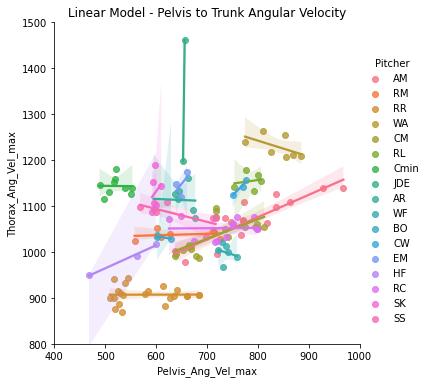

In [12]:
# Linear model plot of kinematic sequences points
# Pelvis angular velocity VS Thorax angular velocity

sequence = sns.lmplot(x='Pelvis_Ang_Vel_max', y='Thorax_Ang_Vel_max', data=wakefb, hue='Pitcher')
sequence.set(xlim=(400, 1000))
sequence.set(ylim=(800, 1500))
sequence.set(title="Linear Model - Pelvis to Trunk Angular Velocity")

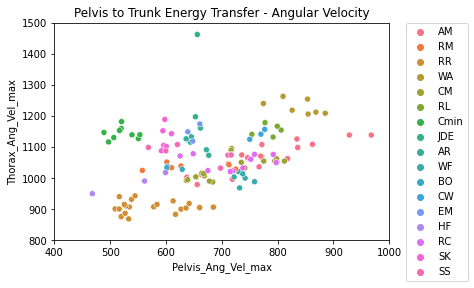

In [13]:
# Scatter plot of kinematic sequences points 1 & 2
# Pelvis angular velocity VS Thorax angular velocity

ksequence1 = sns.scatterplot(x='Pelvis_Ang_Vel_max', y='Thorax_Ang_Vel_max', data=wakefb, hue='Pitcher')
ksequence1.set(xlim=(400, 1000))
ksequence1.set(ylim=(800, 1500))
ksequence1.set(title="Pelvis to Trunk Energy Transfer - Angular Velocity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Plot K-vest relative speed gains!!!

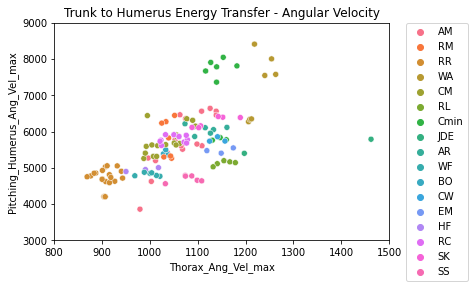

In [14]:
# Scatter plot of kinematic sequences points 2 & 3
# Thorax angular velocity VS Pitching humerus angular velocity

ksequence2 = sns.scatterplot(x='Thorax_Ang_Vel_max', y='Pitching_Humerus_Ang_Vel_max', data=wakefb, hue='Pitcher')
ksequence2.set(xlim=(800, 1500))
ksequence2.set(ylim=(3000, 9000))
ksequence2.set(title="Trunk to Humerus Energy Transfer - Angular Velocity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Plot K-vest relative speed gains!!!

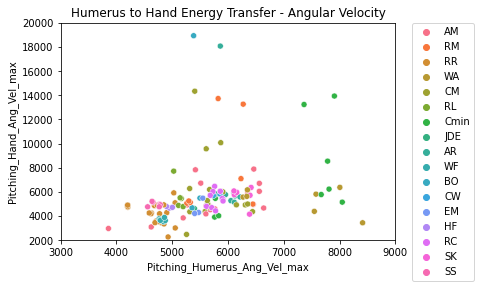

In [15]:
# Scatter plot of kinematic sequences points 3 & 4
# Pitching humerus angular velocity VS Pitching hand angular velocity

ksequence3 = sns.scatterplot(x='Pitching_Humerus_Ang_Vel_max', y='Pitching_Hand_Ang_Vel_max', data=wakefb, hue='Pitcher')
ksequence3.set(xlim=(3000, 9000))
ksequence3.set(ylim=(2000, 20000))
ksequence3.set(title="Humerus to Hand Energy Transfer - Angular Velocity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Plot K-vest relative speed gains!!!

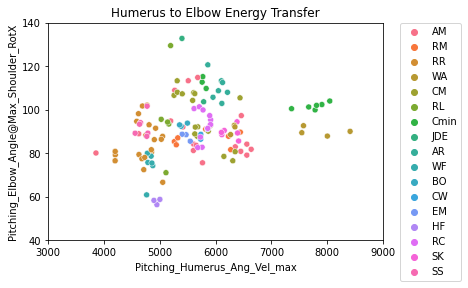

In [16]:
# Look into elbow extension velocity instead of hand angular velocity

elbowext = sns.scatterplot(x='Pitching_Humerus_Ang_Vel_max', y='Pitching_Elbow_Angle@Max_Shoulder_RotX', data=wakefb, hue='Pitcher')
elbowext.set(xlim=(3000, 9000))
elbowext.set(ylim=(40, 140))
elbowext.set(title="Humerus to Elbow Energy Transfer")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [17]:
# Plot mph per unit of force/torque in elbow and shoulder
# Max_Elbow_Flex_Torque
# Max_Elbow_Valgus_Torque
# Max_Elbow_Varus_Torque
# Max_Shoulder_Abd_Torque
# Max_Shoulder_Dist_Force
# Max_Shoulder_Hor_Abd_Torque
# Max_Shoulder_Hor_Add_Torque
# Max_Shoulder_IntRot_Torque
# Max_Elbow_Force
# Elbow_Torque@Max_Shoulder_Rot
# Elbow_Torque@Release